In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
ls

'AVAX_Price&Amount_GC.ipynb'        'PLA_Price&Amount_relation.ipynb'
'AVAX_Price&Amount_relation.ipynb'  'PLA_Price&Count_GC.ipynb'
'AVAX_Price&Count_GC.ipynb'         'PLA_Price&Count_relation.ipynb'
'AVAX_Price&Count_relation.ipynb'    price/
'PDA_Price&Amount_GC.ipynb'          transaction_amount/
'PDA_Price&Amount_relation.ipynb'    transaction_count/
'PDA_Price&Count_GC.ipynb'           transfer_amount/
'PDA_Price&Count_relation.ipynb'     transfer_count/
'PLA_Price&Amount_GC.ipynb'


## 이 파일의 목적
AVAX의 가격의 변동(1. 전일 종가 대비 변동폭, 2. 당일의 high-low 차이 등등)과 `transaction`의 발생 빈도와의 상관관계가 있는지 확인하기 위해 여러 시도를 해보고자 파일을 제작 \
(transfer 아님!! 유의)

In [3]:
avax_price = pd.read_excel('price/BINANCE_AVAXUSDT_D.xlsx')
avax_transaction = pd.read_csv('transaction_amount/AVAX_transaction_Amount.csv')

In [4]:
avax_price

,Unnamed: 0,Open_time,Open,High,Low,Close,Volume,HV,전일종가 대비 변동 폭,기준 13%,기준 20%
0,0,2020-09-22,0.8500,7.0000,0.8500,5.3193,31441883.16,NaN,NaN,NAN,NAN
1,1,2020-09-23,5.3279,5.3600,3.4000,3.5350,12620608.01,NaN,0.335439,0,1
2,2,2020-09-24,3.5305,4.8873,3.4033,4.6411,7107843.86,NaN,0.312900,0,1
3,3,2020-09-25,4.6366,5.0234,4.2001,4.7134,3886096.71,NaN,0.015578,0,0
4,4,2020-09-26,4.7164,4.8200,4.3294,4.5200,1814932.97,NaN,0.041032,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1367,1367,2024-06-20,26.9500,28.8900,26.6700,27.5800,1873349.75,73.678687,0.023756,0,0
1368,1368,2024-06-21,27.5800,28.0300,26.9300,27.4800,1411878.18,73.823462,0.003626,0,0
1369,1369,2024-06-22,27.4800,27.5000,24.5200,25.6100,3754180.61,66.568123,0.068049,0,0
1370,1370,2024-06-23,25.6200,26.1500,24.1200,25.0900,2992605.46,60.138325,0.020305,0,0


In [5]:
avax_transaction

,Date,Transaction Amount
0,2020.9.23,2.343750e-01
1,2020.9.24,1.000000e-01
2,2020.9.25,1.200000e-02
3,2020.9.27,0.000000e+00
4,2020.9.28,0.000000e+00
...,...,...
1370,2024.7.18,2.416854e+06
1371,2024.7.19,2.916211e+06
1372,2024.7.20,2.299388e+06
1373,2024.7.21,3.898406e+06


In [5]:
figsize = (10,6)

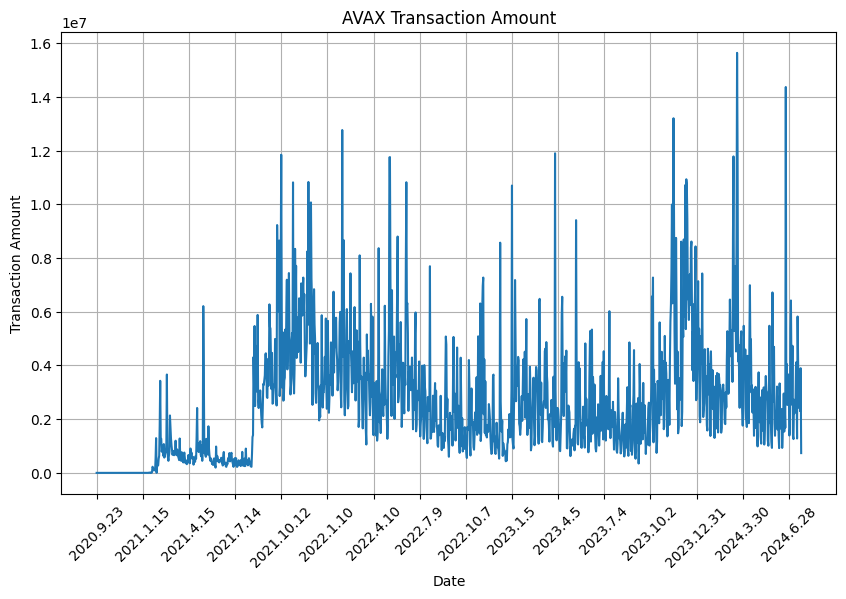

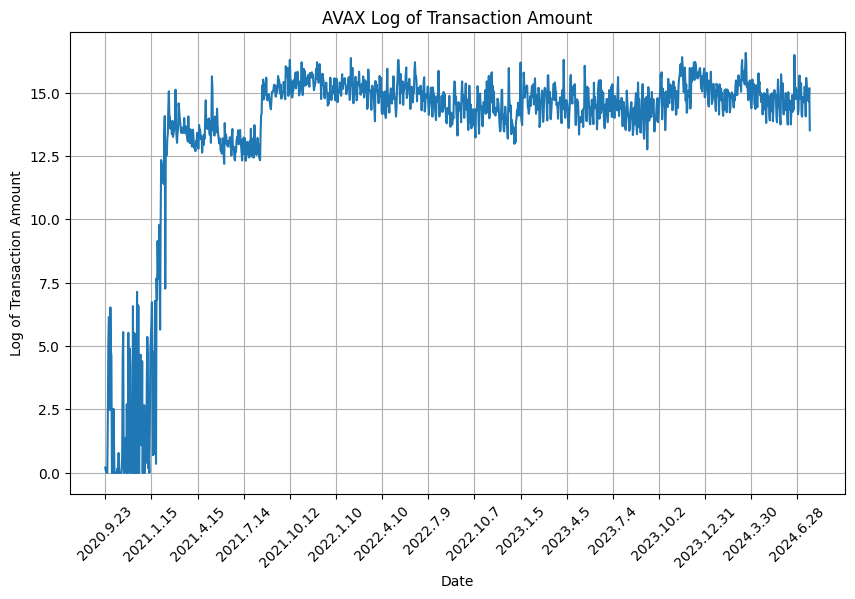

In [7]:
# 첫 번째 그래프: transaction 수

date_ticks = avax_transaction['Date'][::90]

plt.figure(figsize = figsize)
plt.plot(avax_transaction['Date'] ,avax_transaction['Transaction Amount'])
plt.title('AVAX Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()

# 두 번째 그래프: 로그화 시킨 transaction 수
plt.figure(figsize = figsize)
plt.plot(avax_transaction['Date'], np.log(avax_transaction['Transaction Amount']+1)) # Amount가 0인 부분이 있어서 1을 더해서 진행.
plt.title('AVAX Log of Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Log of Transaction Amount')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()
# 로그 그래프는 이분산성을 제거하기 위해 그려봄.

Transaction count와 달리 뭔가 드러나는 부분이 없어 보인다. 이는 뒤에 분석할 때 더 정확하게 봐야겠다.

In [8]:
# transaction의 수가 상위 97%인 날짜.
most_transaction = avax_transaction[avax_transaction['Transaction Amount'] >= avax_transaction['Transaction Amount'].quantile(0.97)]
most_transaction

,Date,Transaction Amount
352,2021.10.4,9.229595e+06
356,2021.10.8,8.653478e+06
360,2021.10.12,1.184901e+07
383,2021.11.4,1.081912e+07
387,2021.11.8,8.342491e+06
389,2021.11.10,7.711641e+06
411,2021.12.2,8.250447e+06
413,2021.12.4,1.083444e+07
418,2021.12.9,1.007264e+07
479,2022.2.8,1.276970e+07


In [9]:
most_transaction_des = most_transaction.sort_values('Transaction Amount', ascending = False)
most_transaction_des

,Date,Transaction Amount
1249,2024.3.19,1.564265e+07
1344,2024.6.22,1.437119e+07
1125,2023.11.16,1.320731e+07
479,2022.2.8,1.276970e+07
894,2023.3.30,1.190266e+07
360,2021.10.12,1.184901e+07
1242,2024.3.12,1.178630e+07
1250,2024.3.20,1.178409e+07
572,2022.5.12,1.176154e+07
571,2022.5.11,1.174930e+07


거래 크기의 순위로 보면 특별히 어느 달이 많이 이뤄졌다고 보기 힘들다. 이는 거래 양자체가 가격에 영향을 직접적으로 주지 않을 수 있다고 봐야할 수도 있다.

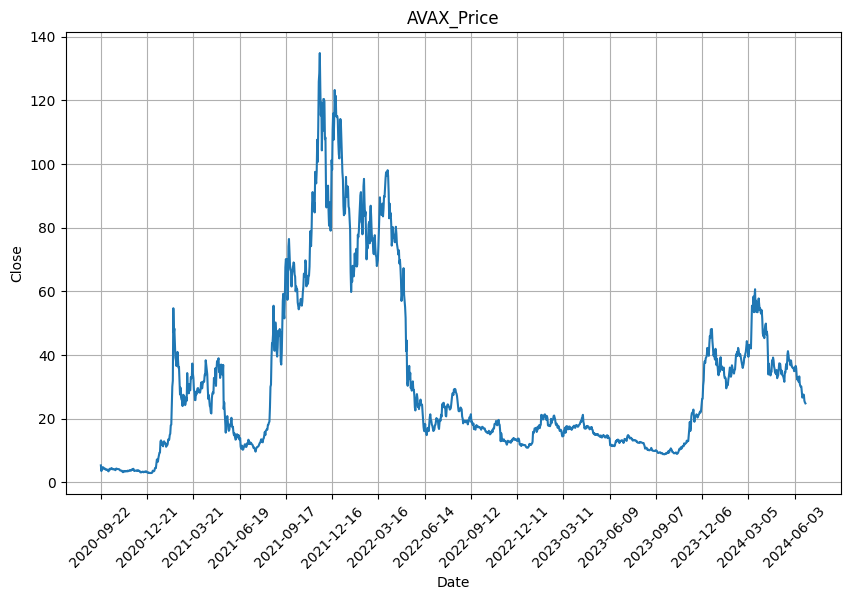

In [6]:
# 일자별 가격변동
date_ticks = avax_price['Open_time'][::90]

plt.figure(figsize = figsize)
plt.plot(avax_price['Open_time'], avax_price['Close'])
plt.title('AVAX_Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()

In [11]:
avax_transaction

,Date,Transaction Amount
0,2020.9.23,2.343750e-01
1,2020.9.24,1.000000e-01
2,2020.9.25,1.200000e-02
3,2020.9.27,0.000000e+00
4,2020.9.28,0.000000e+00
...,...,...
1370,2024.7.18,2.416854e+06
1371,2024.7.19,2.916211e+06
1372,2024.7.20,2.299388e+06
1373,2024.7.21,3.898406e+06


In [12]:
# 날짜를 인덱스로 설정
avax_transaction_time = avax_transaction.set_index('Date')

# 시계열 분해 (추세, 계절성, 잔차)
decomposition = seasonal_decompose(avax_transaction_time['Transaction Amount'], model='additive', period = 7) # 가법으로 분해.

# 분해된 요소들 추출
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

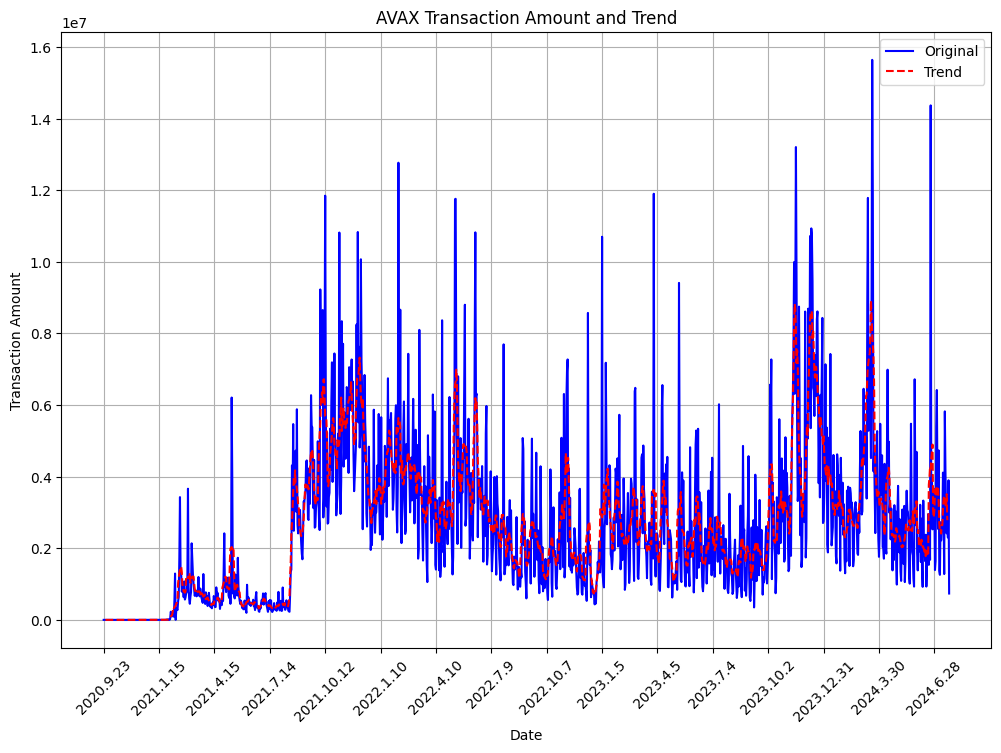

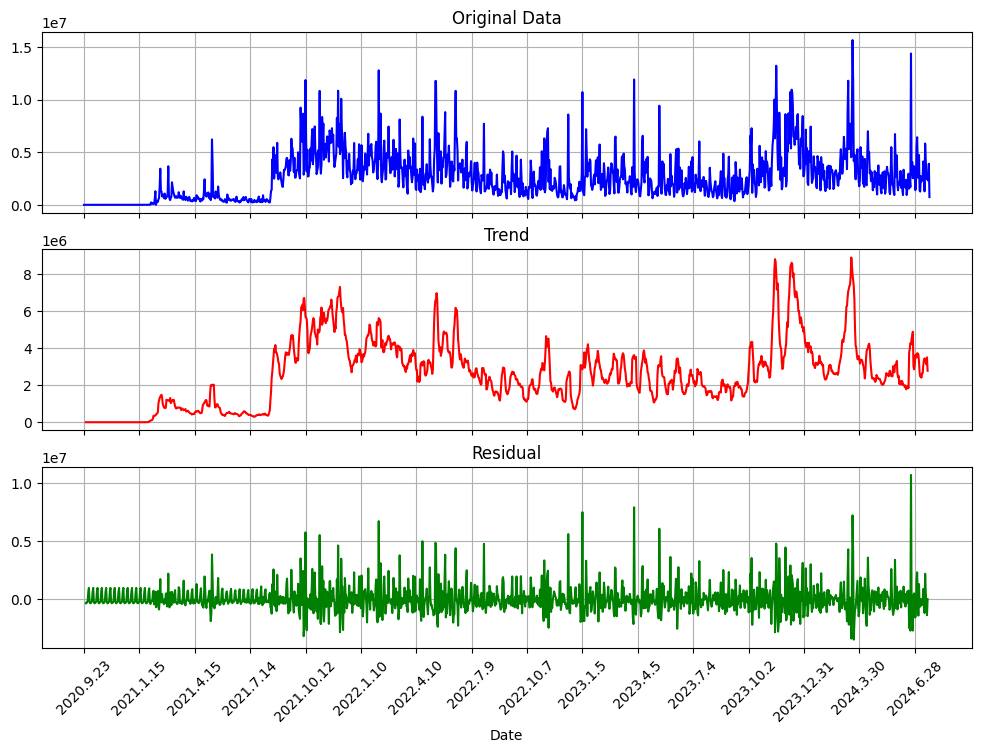

In [13]:
date_ticks = avax_transaction_time.index[::90]

# 원본 데이터 및 추세 시각화
figsize = (12, 8)
plt.figure(figsize=figsize)
plt.plot(avax_transaction_time.index, avax_transaction_time['Transaction Amount'], label='Original', color='blue')
plt.plot(trend.index, trend, label='Trend', color='red', linestyle='--')
plt.title('AVAX Transaction Amount and Trend')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(date_ticks, rotation=45)
plt.legend()
plt.grid()
plt.show()

# 분해된 요소들 시각화
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize, sharex=True)
ax1.plot(avax_transaction_time.index, avax_transaction_time['Transaction Amount'], label='Original', color='blue')
ax1.set_title('Original Data')
ax1.grid()

ax2.plot(trend.index, trend, label='Trend', color='red')
ax2.set_title('Trend')
ax2.grid()

ax3.plot(residual.index, residual, label='Residual', color='green')
ax3.set_title('Residual')
ax3.grid()

plt.xticks(date_ticks, rotation=45)
plt.xlabel('Date')
plt.show()

Log 변환한 후에 시계열 분석

In [14]:
# 날짜를 인덱스로 설정
avax_transaction_time = avax_transaction.set_index('Date')

# 시계열 분해 (추세, 계절성, 잔차)
decomposition_log = seasonal_decompose(np.log(avax_transaction_time['Transaction Amount']+1), model='additive', period = 7) # 가법으로 분해. 0인 부분이 있어서 1을 더함.

# 분해된 요소들 추출
trend = decomposition_log.trend
seasonal = decomposition_log.seasonal
residual = decomposition_log.resid

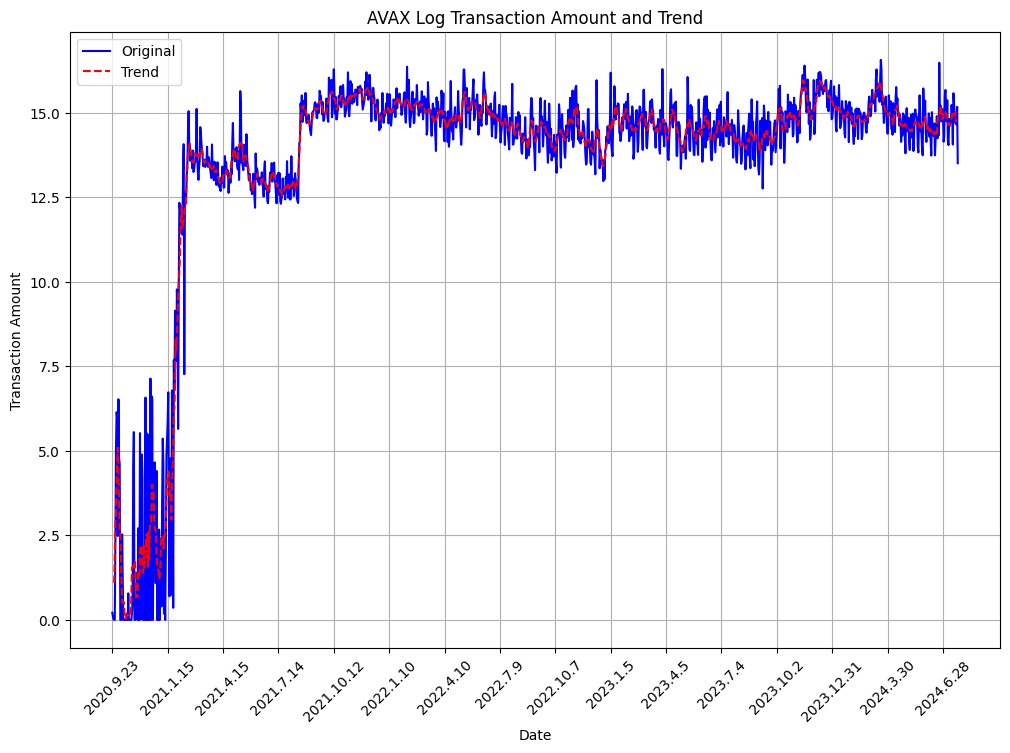

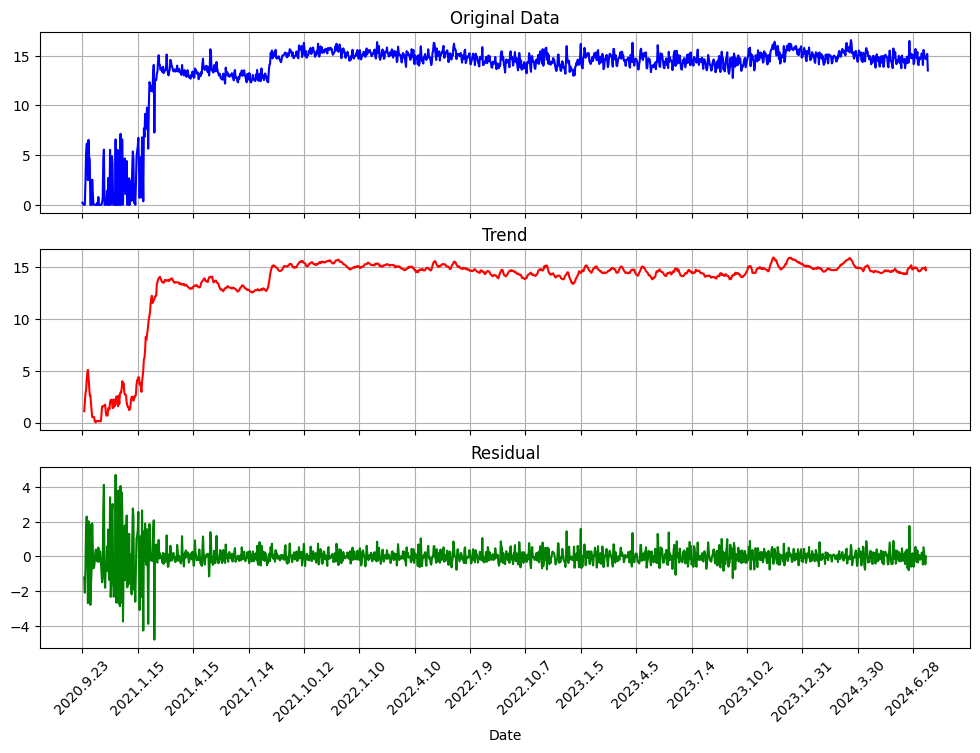

In [15]:
date_ticks = avax_transaction_time.index[::90]

# 원본 데이터 및 추세 시각화
figsize = (12, 8)
plt.figure(figsize=figsize)
plt.plot(avax_transaction_time.index, np.log(avax_transaction_time['Transaction Amount']+1), label='Original', color='blue') # 0인 부분이 있어서 1을 더함.
plt.plot(trend.index, trend, label='Trend', color='red', linestyle='--')
plt.title('AVAX Log Transaction Amount and Trend')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(date_ticks, rotation=45)
plt.legend()
plt.grid()
plt.show()

# 분해된 요소들 시각화
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize, sharex=True)
ax1.plot(avax_transaction_time.index, np.log(avax_transaction_time['Transaction Amount']+1), label='Original', color='blue')
ax1.set_title('Original Data')
ax1.grid()

ax2.plot(trend.index, trend, label='Trend', color='red')
ax2.set_title('Trend')
ax2.grid()

ax3.plot(residual.index, residual, label='Residual', color='green')
ax3.set_title('Residual')
ax3.grid()

plt.xticks(date_ticks, rotation=45)
plt.xlabel('Date')
plt.show()

log 변환해서 분석을 해보니 후반의 불규칙성은 잡았지만, 초반의 불규칙성이 매우 크게 나타남. 이게 맞는 분석 같음. 왜냐하면 저 때 사실 가격이 매우 크게 올랐기 때문에 log변환해서 살펴보는 것이 맞아보이고, 저 불규칙성이 강한 부분에 가격이 브게 변동이 됨.

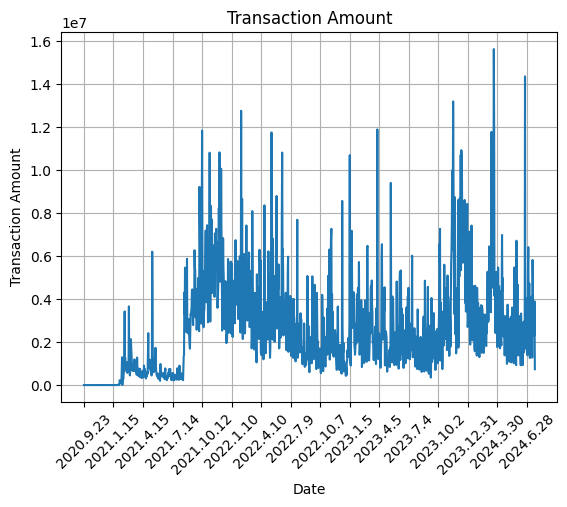

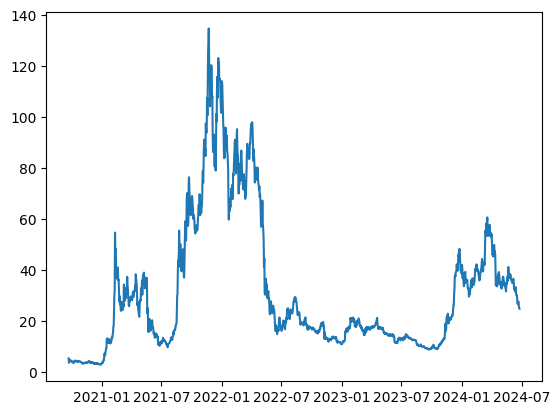

In [26]:
# 일자별 가격변동
date_ticks = avax_transaction['Date'][::90]

plt.plot(avax_transaction['Date'] ,avax_transaction['Transaction Amount'])
plt.title('Transaction Amount')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()

plt.plot(avax_price['Open_time'], avax_price['Close'])

이제 변동성이 어떻게 되는지도 한번 봐보자. 가격 변동성과 transaction 수의 변동성도 같이 말이다.

In [27]:
avax_transaction['volaity'] = np.abs((avax_transaction['Transaction Amount'] - avax_transaction['Transaction Amount'].shift(1))/avax_transaction['Transaction Amount'])
avax_transaction

,Date,Transaction Amount,volaity
0,2020.9.23,2.343750e-01,NaN
1,2020.9.24,1.000000e-01,1.343750
2,2020.9.25,1.200000e-02,7.333334
3,2020.9.27,0.000000e+00,inf
4,2020.9.28,0.000000e+00,NaN
...,...,...,...
1370,2024.7.18,2.416854e+06,0.253349
1371,2024.7.19,2.916211e+06,0.171235
1372,2024.7.20,2.299388e+06,0.268255
1373,2024.7.21,3.898406e+06,0.410172


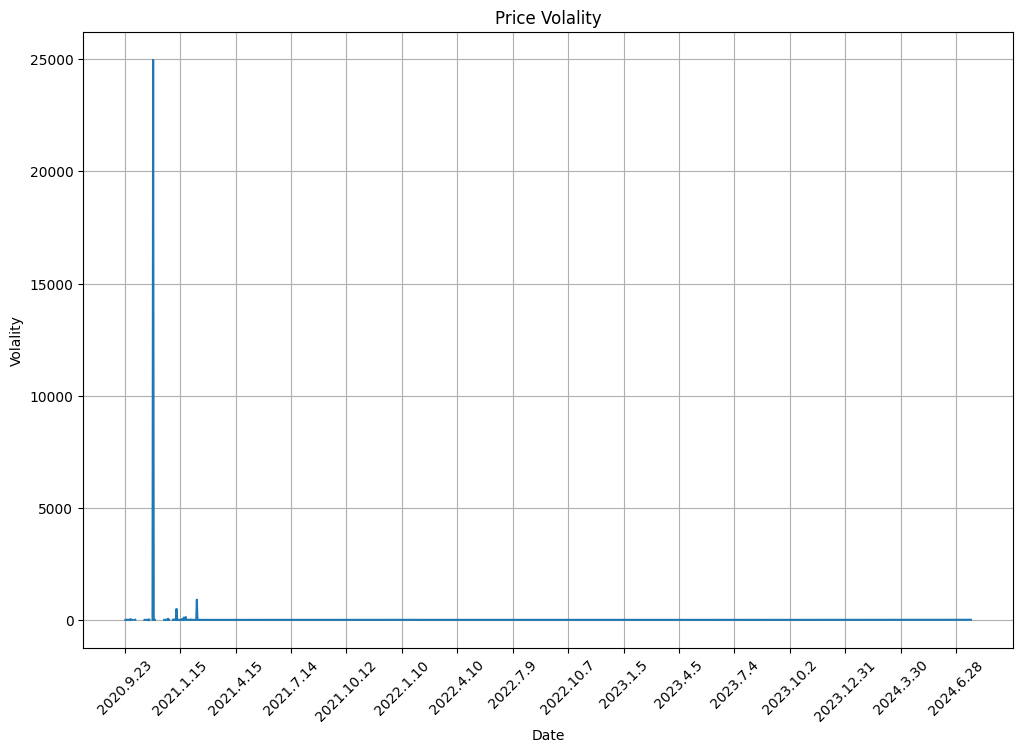

In [28]:
# 일자별 transaction수의 변동

date_ticks = avax_transaction['Date'][::90]

plt.figure(figsize = figsize)
plt.plot(avax_transaction['Date'], avax_transaction['volaity'])
plt.title('Price Volality')
plt.xlabel('Date')
plt.ylabel('Volality')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()
# 특정 날짜가 너무커서 log로 변환 후에 살펴보자.

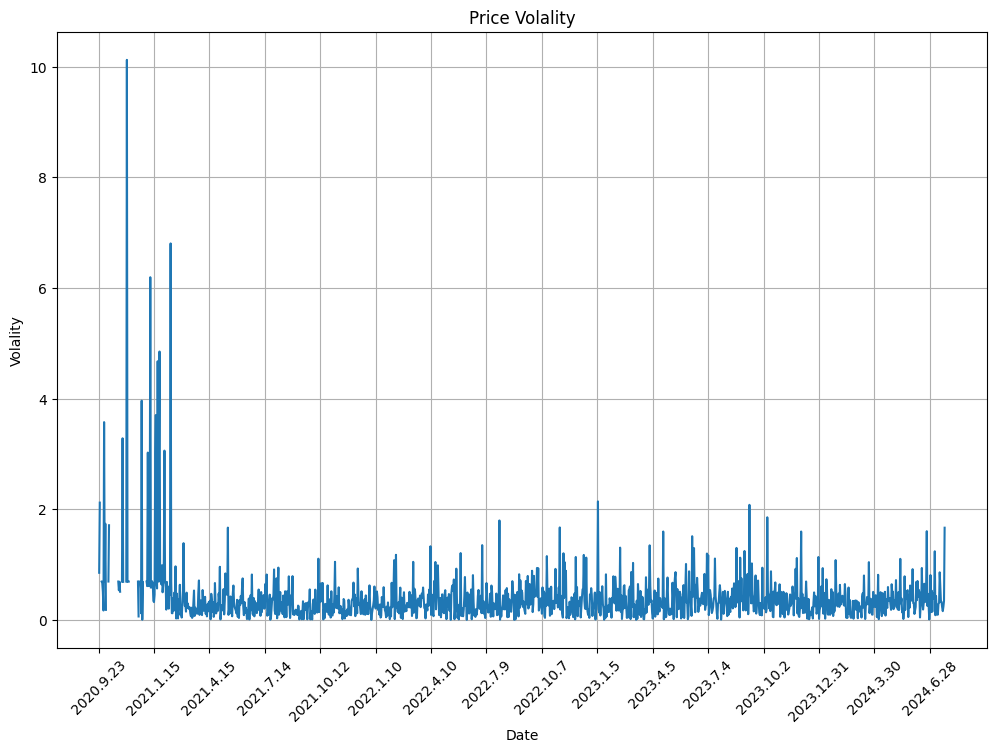

In [29]:
# 일자별 transaction수의 변동

date_ticks = avax_transaction['Date'][::90]

plt.figure(figsize = figsize)
plt.plot(avax_transaction['Date'], np.log(avax_transaction['volaity']+1))
plt.title('Price Volality')
plt.xlabel('Date')
plt.ylabel('Volality')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()
# 특정 날짜가 너무커서 log로 변환 후에 살펴봄.

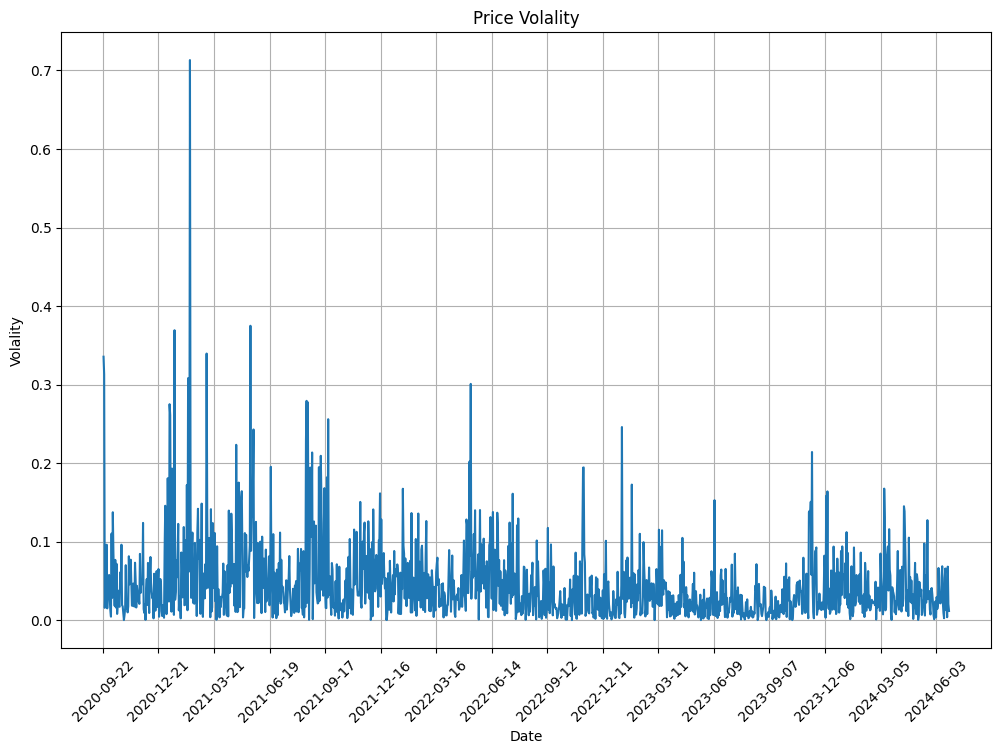

In [30]:
# 일자별 가격변동

date_ticks = avax_price['Open_time'][::90]

plt.figure(figsize = figsize)
plt.plot(avax_price['Open_time'], avax_price['전일종가 대비 변동 폭'])
plt.title('Price Volality')
plt.xlabel('Date')
plt.ylabel('Volality')
plt.xticks(date_ticks, rotation=45)
plt.grid()
plt.show()

차라리 이게 더 연관이 있어보인다. transaction amout와 가격 변동성간의 그래프가 더 비슷해 보인다. 물론 이도 크게 같아 보이진 않지만.

In [4]:
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 수행
result = adfuller(avax_transaction['Transaction Amount'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# 정성적 해석
if result[1] < 0.05:
    print("귀무 가설 기각: 시계열 데이터가 정상을 만족합니다.")
else:
    print("귀무 가설 채택: 시계열 데이터가 정상을 만족하지 않습니다.")


ADF Statistic: -3.0575861858188462
p-value: 0.029855421528476322
Critical Values: {'1%': -3.4351995694971165, '5%': -2.8636817142206836, '10%': -2.5679102510737173}
귀무 가설 기각: 시계열 데이터가 정상을 만족합니다.


In [5]:
# ADF 테스트 수행
result = adfuller(avax_price['Close'].dropna())

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# 정성적 해석
if result[1] < 0.05:
    print("귀무 가설 기각: 시계열 데이터가 정상을 만족합니다.")
else:
    print("귀무 가설 채택: 시계열 데이터가 정상을 만족하지 않습니다.")


ADF Statistic: -2.2018791574563257
p-value: 0.20556413819406316
Critical Values: {'1%': -3.4351603284454986, '5%': -2.863664398126376, '10%': -2.567901029668299}
귀무 가설 채택: 시계열 데이터가 정상을 만족하지 않습니다.


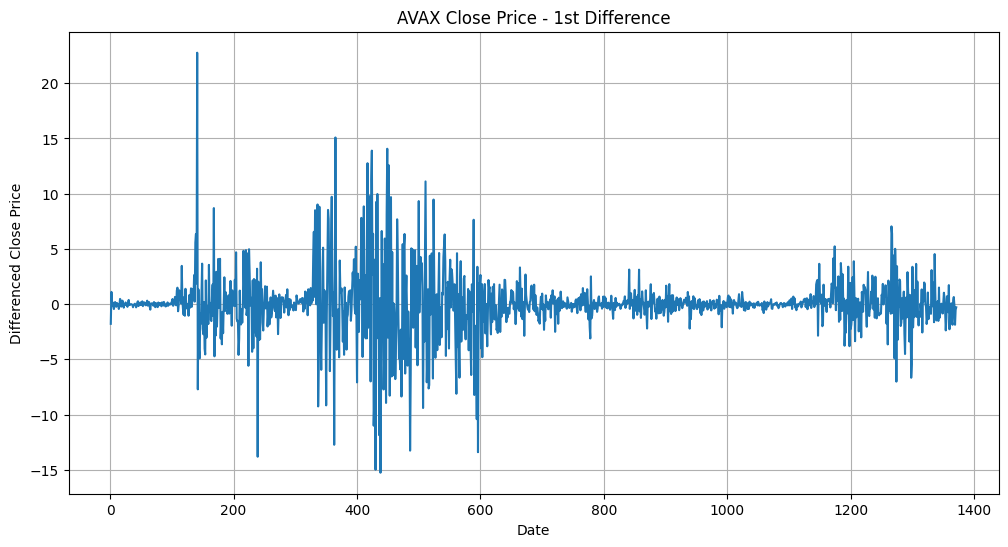

ADF Statistic: -11.3386879106982
p-value: 1.0678407824180464e-20
Critical Values: {'1%': -3.4351603284454986, '5%': -2.863664398126376, '10%': -2.567901029668299}
귀무 가설 기각: 차분된 시계열 데이터가 정상을 만족합니다.


In [6]:
avax_price['Close_diff'] = avax_price['Close'].diff()

# 1차 차분 후의 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(avax_price.index, avax_price['Close_diff'])
plt.title('AVAX Close Price - 1st Difference')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.grid()
plt.show()

# ADF 테스트 수행
adf_result_diff = adfuller(avax_price['Close_diff'].dropna())
print('ADF Statistic:', adf_result_diff[0])
print('p-value:', adf_result_diff[1])
print('Critical Values:', adf_result_diff[4])
if adf_result_diff[1] < 0.05:
    print("귀무 가설 기각: 차분된 시계열 데이터가 정상을 만족합니다.")
else:
    print("귀무 가설 채택: 차분된 시계열 데이터가 정상을 만족하지 않습니다.")
